# Drug Groupings

In [2]:
%run -m ipy_startup
%run -m ipy_logging
%run -m ipy_seaborn
%matplotlib inline
from mgds.data_aggregation import api
from mgds.data_aggregation import database as db
from mgds.data_aggregation import source as src
from mgds.data_aggregation import data_type as dtyp
from mgds.data_aggregation import entity
from mgds.data_modeling import data_broker as dbm
from mgds.data_modeling import training01 as rx_train
from mgds.data_modeling import data as feature_data

# By FDA Status

In [16]:
d_rx = api.get_raw_genomic_data(src.CTD_v2, dtyp.DRUG_SENSITIVITY)
d_raw = db.load(src.CTD_v2, db.IMPORT, 'drug-sensitivity')

d_raw.info()

2017-02-18 11:34:58,572:WARNING:mgds.data_aggregation.api: Genomic data for source "ctd_v2" and data type "drug-sensitivity" has a cell line mapping but does not have a primary site mapping (so all primary site fields will be null)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 395263 entries, 0 to 395262
Data columns (total 10 columns):
CELL_LINE_ID        395263 non-null object
CELL_LINE_ID:CTD    395263 non-null int64
DRUG_ID:CTD         395263 non-null int64
SMILES              395263 non-null object
DRUG_NAME           395263 non-null object
STATUS              395263 non-null object
DRUG_ID:BROAD       395263 non-null object
AUC                 395263 non-null float64
LOG2_EC50           395263 non-null float64
EXPERIMENT_ID       395263 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 33.2+ MB


In [23]:
ids = d_raw[d_raw['STATUS'] == 'FDA']['DRUG_ID:CTD'].unique()
dt = d_rx[d_rx['DRUG_ID:CTD'].isin(ids)]['DRUG_NAME:MGDS'].unique()
dt

array(['CHLORAMBUCIL', 'FLUOROURACIL', 'CIMETIDINE', 'AZACITIDINE',
       'TRIFLUOPERAZINE', 'PACLITAXEL', 'TAMOXIFEN', 'CARBOPLATIN',
       'TENIPOSIDE', 'SILDENAFIL', 'SIMVASTATIN', 'PROCARBAZINE',
       'CICLOPIROX', 'METHOTREXATE', 'LOVASTATIN', 'VALDECOXIB',
       'DACARBAZINE', 'PROCHLORPERAZINE', 'IFOSFAMIDE', 'DOXORUBICIN',
       'TOPOTECAN', 'ETOPOSIDE', 'MITOMYCIN', 'TACROLIMUS', 'DASATINIB',
       'ERLOTINIB', 'CICLOSPORIN', 'RAPAMYCIN', 'SITAGLIPTIN',
       'VINCRISTINE', 'CYTARABINE', 'ITRACONAZOLE', 'IMATINIB',
       'DECITABINE', 'VANDETANIB', 'SORAFENIB', 'TEMOZOLOMIDE',
       'BEXAROTENE', 'NILOTINIB', 'SUNITINIB', 'BENDAMUSTINE', 'PLATIN',
       'BORTEZOMIB', 'GEMCITABINE', 'FULVESTRANT', 'REGORAFENIB',
       'LENVATINIB', 'RUXOLITINIB', 'BLEOMYCIN', 'FINGOLIMOD', 'PAZOPANIB',
       'PLX4032', 'TIGECYCLINE', 'CLOFARABINE', 'FLUVASTATIN', 'BOSUTINIB',
       'TEMSIROLIMUS', 'NELARABINE', 'ATRA', 'DEXAMETHASONE', 'CRIZOTINIB',
       'LAPATINIB', 'XL184', 'C

# By COSMIC Paper

In [7]:
df = api.get_raw_genomic_data(src.GDSC_v2, dtyp.DRUG_SENSITIVITY)
gdsc_drugs = df['DRUG_NAME:MGDS'].unique()
len(gdsc_drugs)

251

In [8]:
cosmic_drugs = [
    '(5Z)-7-Oxozeaenol', '17-AAG', '5-Fluorouracil', '681640', 'A-443654', 'A-770041', 'ABT-263', 'ABT-869', 
    'ABT-888', 'AC220', 'AG-014699', 'AICAR', 'AKT inhibitor VIII', 'AMG-706', 'AP-24534', 'AR-42', 'AS601245', 
    'AS605240', 'AT-7519', 'ATRA', 'AUY922', 'AV-951', 'AZ628', 'AZD-0530', 'AZD-2281', 'AZD6244', 'AZD6482', 
    'AZD7762', 'AZD8055', 'Afatinib', 'Afatinib (rescreen)', 'Axitinib', 'BAY 61-3606', 'BI-2536', 'BIRB 0796', 
    'BIX02189', 'BMN-673', 'BMS-345541', 'BMS-509744', 'BMS-536924', 'BMS-708163', 'BMS-754807', 'BX-795', 
    'BX-912', 'Bexarotene', 'Bicalutamide', 'Bleomycin', 'Bleomycin (50 uM)', 'Bortezomib', 'Bosutinib', 
    'Bryostatin 1', 'CAL-101', 'CAY10603', 'CCT007093', 'CCT018159', 'CEP-701', 'CGP-082996', 'CGP-60474', 
    'CH5424802', 'CHIR-99021', 'CI-1040', 'CMK', 'CP466722', 'CP724714', 'CUDC-101', 'CX-5461', 'Camptothecin', 
    'Cetuximab', 'Cisplatin', 'Crizotinib', 'Cyclopamine', 'Cytarabine', 'DMOG', 'Dabrafenib', 'Dasatinib', 
    'Docetaxel', 'Doxorubicin', 'EHT 1864', 'EKB-569', 'EX-527', 'Elesclomol', 'Embelin', 'Epothilone B', 
    'Erlotinib', 'Etoposide', 'FH535', 'FK866', 'FMK', 'FR-180204', 'FTI-277', 'GDC0941', 'GDC0941 (rescreen)', 
    'GNF-2', 'GSK-1904529A', 'GSK-650394', 'GSK1070916', 'GSK2126458', 'GSK269962A', 'GSK429286A', 'GSK690693', 
    'GW 441756', 'GW-2580', 'GW843682X', 'Gefitinib', 'Gemcitabine', 'Genentech Cpd 10', 'HG-5-113-01', 'HG-5-88-01', 
    'HG-6-64-1', 'I-BET-762', 'IOX2', 'IPA-3', 'Imatinib', 'JNJ-26854165', 'JNK Inhibitor VIII', 'JNK-9L', 'JQ1', 
    'JQ12', 'JW-7-24-1', 'JW-7-52-1', 'KIN001-055', 'KIN001-102', 'KIN001-135', 'KIN001-236', 'KIN001-244', 
    'KIN001-260', 'KIN001-266', 'KIN001-270', 'KU-55933', 'LAQ824', 'LFM-A13', 'LY317615', 'Lapatinib', 
    'Lenalidomide', 'MG-132', 'MK-2206', 'MLN4924', 'MP470', 'MPS-1-IN-1', 'MS-275', 'Masitinib', 'Methotrexate', 
    'Midostaurin', 'Mitomycin C', 'NG-25', 'NPK76-II-72-1', 'NSC-207895', 'NSC-87877', 'NU-7441', 'NVP-BEZ235', 
    'NVP-BHG712', 'NVP-TAE684', 'Nilotinib', 'Nutlin-3a', 'OSI-027', 'OSI-906', 'OSI-930', 'OSU-03012', 
    'Obatoclax Mesylate', 'Olaparib', 'PAC-1', 'PD-0325901', 'PD-0332991', 'PD-173074', 'PF-4708671', 'PF-562271', 
    'PFI-1', 'PHA-665752', 'PHA-793887', 'PI-103', 'PIK-93', 'PLX4720', 'PLX4720 (rescreen)', 'PXD101, Belinostat', 
    'Paclitaxel', 'Parthenolide', 'Pazopanib', 'Phenformin', 'Pyrimethamine', 'QL-VIII-58', 'QL-X-138', 'QL-XI-92', 
    'QL-XII-47', 'QL-XII-61', 'QS11', 'RDEA119', 'RDEA119 (rescreen)', 'RO-3306', 'Rapamycin', 'Roscovitine', 
    'Ruxolitinib', 'S-Trityl-L-cysteine', 'SB 216763', 'SB-505124', 'SB-715992', 'SB52334', 'SB590885', 'SGC0946', 
    'SL 0101-1', 'SN-38', 'SNX-2112', 'STF-62247', 'Salubrinal', 'Shikonin', 'Sorafenib', 'Sunitinib', 'T0901317', 
    'TAK-715', 'TG101348', 'TGX221', 'THZ-2-102-1', 'THZ-2-49', 'TL-1-85', 'TL-2-105', 'TPCA-1', 'TW 37', 
    'Tamoxifen', 'Temozolomide', 'Temsirolimus', 'Thapsigargin', 'Tipifarnib', 'Trametinib', 'Tubastatin A', 
    'UNC0638', 'UNC1215', 'VNLG/124', 'VX-11e', 'VX-680', 'VX-702', 'Vinblastine', 'Vinorelbine', 'Vismodegib', 
    'Vorinostat', 'WH-4-023', 'WZ-1-84', 'WZ3105', 'XAV 939', 'XL-184', 'XL-880', 'XMD11-85h', 'XMD13-2', 
    'XMD14-99', 'XMD15-27', 'XMD8-85', 'XMD8-92', 'Y-39983', 'YK 4-279', 'YM155', 'YM201636', 'Z-LLNle-CHO', 
    'ZG-10', 'ZM-447439', 'ZSTK474', 'Zibotentan, ZD4054', 'piperlongumine', 'rTRAIL', 
]
cosmic_drugs = np.array([entity.remove_non_alphanum(v.upper().strip()) for v in cosmic_drugs])
len(cosmic_drugs), cosmic_drugs[:10]

(256, array(['5Z7OXOZEAENOL', '17AAG', '5FLUOROURACIL', '681640', 'A443654',
        'A770041', 'ABT263', 'ABT869', 'ABT888', 'AC220'], 
       dtype='<U17'))

In [11]:
from py_utils import set_utils
diff = set_utils.analyze_sets(gdsc_drugs, cosmic_drugs, items=True)
diff['Stats']

{'All': '275 (100%)',
 'InBoth': '232 (84.36%)',
 'InOnlyOne': '43 (15.64%)',
 'InOnlySet1': '19 (6.91%)',
 'InOnlySet2': '24 (8.73%)'}

Results -- This is the list of overlapping drugs to use for comparison against COSMIC paper

In [19]:
'"{}"'.format('","'.join(diff['Items']['InBoth']))

'"SUNITINIB","SB590885","YM201636","KIN001055","GSK690693","YM155","GEMCITABINE","JNKINHIBITORVIII","LY317615","AZD7762","XMD132","CGP60474","PHA665752","OLAPARIB","NG25","THZ21021","681640","AP24534","IPA3","BRYOSTATIN1","BMS536924","VX680","PD0325901","CISPLATIN","CHIR99021","QS11","ZG10","EPOTHILONEB","BOSUTINIB","EKB569","ZM447439","NUTLIN3A","CYTARABINE","TRAMETINIB","BMS509744","KIN001266","VINORELBINE","STRITYLLCYSTEINE","KIN001135","NILOTINIB","FH535","XMD885","UNC1215","FMK","VX11E","17AAG","EX527","PARTHENOLIDE","TIPIFARNIB","AMG706","ETOPOSIDE","CYCLOPAMINE","KIN001270","AC220","AXITINIB","WZ184","CCT007093","XMD1499","PD173074","TAMOXIFEN","SHIKONIN","BMS754807","AFATINIB","GW843682X","STF62247","LAPATINIB","JQ1","JW7521","RTRAIL","BIX02189","DOXORUBICIN","TUBASTATINA","MIDOSTAURIN","XL184","ZSTK474","IMATINIB","JQ12","5FLUOROURACIL","EHT1864","T0901317","PLX4720","TL2105","CGP082996","BLEOMYCIN","KIN001102","SB216763","BORTEZOMIB","PACLITAXEL","PYRIMETHAMINE","AG014699","E

In [16]:
#diff['Items']['InOnlySet2']

# By Sensitivity

In [2]:
df = api.get_raw_genomic_data(src.GDSC_v2, dtyp.DRUG_SENSITIVITY)
df['INDICATOR'] = 1

In [3]:
df.head()

,IC50_RESULTS_ID,CELL_LINE_ID:COSMIC,DRUG_ID:COSMIC,MAX_CONC_MICROMOLAR,LN_IC50,AUC,RMSE,DRUG_NAME,SYNONYMS,TARGET,TARGET_PATHWAY,CELL_LINE_ID,CELL_LINE_ID:MGDS,PRIMARY_SITE:MGDS,PRIMARY_SITE:SOURCE,DRUG_NAME:MGDS,DRUG_NAME:SOURCE,INDICATOR
0,335,924100,1026,1.0,0.717722,0.899410,0.105665,17-AAG,tanespimycin,HSP90,other,22RV1,22RV1,PROSTATE,PROSTATE,17AAG,17-AAG,1
1,336,924100,1028,2.0,2.664100,0.957206,0.178243,VX-702,NaN,p38,JNK and p38 signaling,22RV1,22RV1,PROSTATE,PROSTATE,VX702,VX-702,1
2,337,924100,1029,2.0,3.336828,0.973893,0.079845,AMG-706,AMG-706,"VEGFR, RET, c-KIT, PDGFR",RTK signaling,22RV1,22RV1,PROSTATE,PROSTATE,AMG706,AMG-706,1
3,338,924100,1030,10.0,5.164909,0.977844,0.094228,KU-55933,NaN,ATM,Genome integrity,22RV1,22RV1,PROSTATE,PROSTATE,KU55933,KU-55933,1
4,339,924100,1031,0.2,-4.325309,0.508180,0.090478,Elesclomol,NaN,HSP70,other,22RV1,22RV1,PROSTATE,PROSTATE,ELESCLOMOL,Elesclomol,1


In [4]:
d_path = df[['DRUG_NAME:MGDS', 'TARGET_PATHWAY']].drop_duplicates()

In [5]:
d_path[d_path['DRUG_NAME:MGDS'] == 'NAVITOCLAX']

,DRUG_NAME:MGDS,TARGET_PATHWAY
197,NAVITOCLAX,apoptosis regulation


In [6]:
d_path['TARGET_PATHWAY'].value_counts()

other                             72
RTK signaling                     26
PI3K signaling                    18
ERK MAPK signaling                16
DNA replication                   14
cytoskeleton                      11
cell cycle                        11
chromain  histone acetylation     10
mitosis                           10
ABL signaling                      9
Genome integrity                   8
EGFR signaling                     8
TOR signaling                      7
apoptosis regulation               7
JNK and p38 signaling              6
IGFR signaling                     4
metabolism                         3
chromatin  other                   3
p53 pathway                        3
WNT signaling                      3
chromatin  histone methylation     2
Name: TARGET_PATHWAY, dtype: int64

In [7]:
d_path[d_path['TARGET_PATHWAY'] == 'apoptosis regulation']

,DRUG_NAME:MGDS,TARGET_PATHWAY
32,TW37,apoptosis regulation
53,RTRAIL,apoptosis regulation
89,EMBELIN,apoptosis regulation
91,PAC1,apoptosis regulation
97,OBATOCLAX,apoptosis regulation
144,YM155,apoptosis regulation
197,NAVITOCLAX,apoptosis regulation


In [8]:
"','".join(d_path[d_path['TARGET_PATHWAY'] == 'apoptosis regulation']['DRUG_NAME:MGDS'].values)

"TW37','RTRAIL','EMBELIN','PAC1','OBATOCLAX','YM155','NAVITOCLAX"

# Correlations

In [9]:
dt = df[df['LN_IC50'].notnull()]
dt.groupby(['CELL_LINE_ID:MGDS', 'DRUG_NAME:MGDS']).size().value_counts()

1    205148
dtype: int64

In [10]:
dc = df[df['CELL_LINE_ID:MGDS'].notnull()]
dc = dc.pivot(index='CELL_LINE_ID:MGDS', columns='DRUG_NAME:MGDS', values='LN_IC50')
dc.head()

DRUG_NAME:MGDS,17AAG,5FLUOROURACIL,5Z7OXOZEAENOL,681640,A443654,A770041,AC220,AFATINIB,AG014699,AICAR,...,XMD892,Y39983,YK4279,YM155,YM201636,ZG10,ZIBOTENTAN,ZLLNLECHO,ZM447439,ZSTK474
CELL_LINE_ID:MGDS,,,,,,,,,,,,,,,,,,,,,
201T,-1.714008,3.770916,NaN,2.861394,NaN,NaN,1.191040,NaN,4.700540,10.164367,...,NaN,4.953417,NaN,-1.478410,1.339958,NaN,5.727925,NaN,2.853266,0.552314
22RV1,0.717722,0.599834,2.510877,2.687990,NaN,NaN,3.055242,4.165454,2.813023,8.329869,...,4.647239,4.981842,2.661789,-5.184732,1.304883,2.269553,6.153517,NaN,3.588219,-0.581419
2313287,-2.270127,1.377006,1.290695,2.445952,NaN,NaN,2.380925,4.312399,4.294719,8.592325,...,NaN,3.471085,0.811247,-3.129232,1.019614,NaN,5.590160,NaN,3.288567,0.048097
42MGBA,-2.503345,2.211866,0.577442,1.955192,NaN,NaN,1.973690,4.415150,2.339015,7.604888,...,NaN,4.263127,1.193378,-5.875563,2.609145,NaN,5.655940,NaN,1.379312,2.252558
451LU,-2.794440,4.657338,-3.382185,NaN,NaN,NaN,2.519690,3.483061,3.406131,8.156105,...,2.096665,4.903078,1.010833,-3.733765,2.578167,1.681739,5.372183,NaN,NaN,2.236231


In [11]:
dc_spearman = dc.corr(method='spearman')
dc_pearson = dc.corr(method='pearson')

In [ ]:
sns.heatmap()

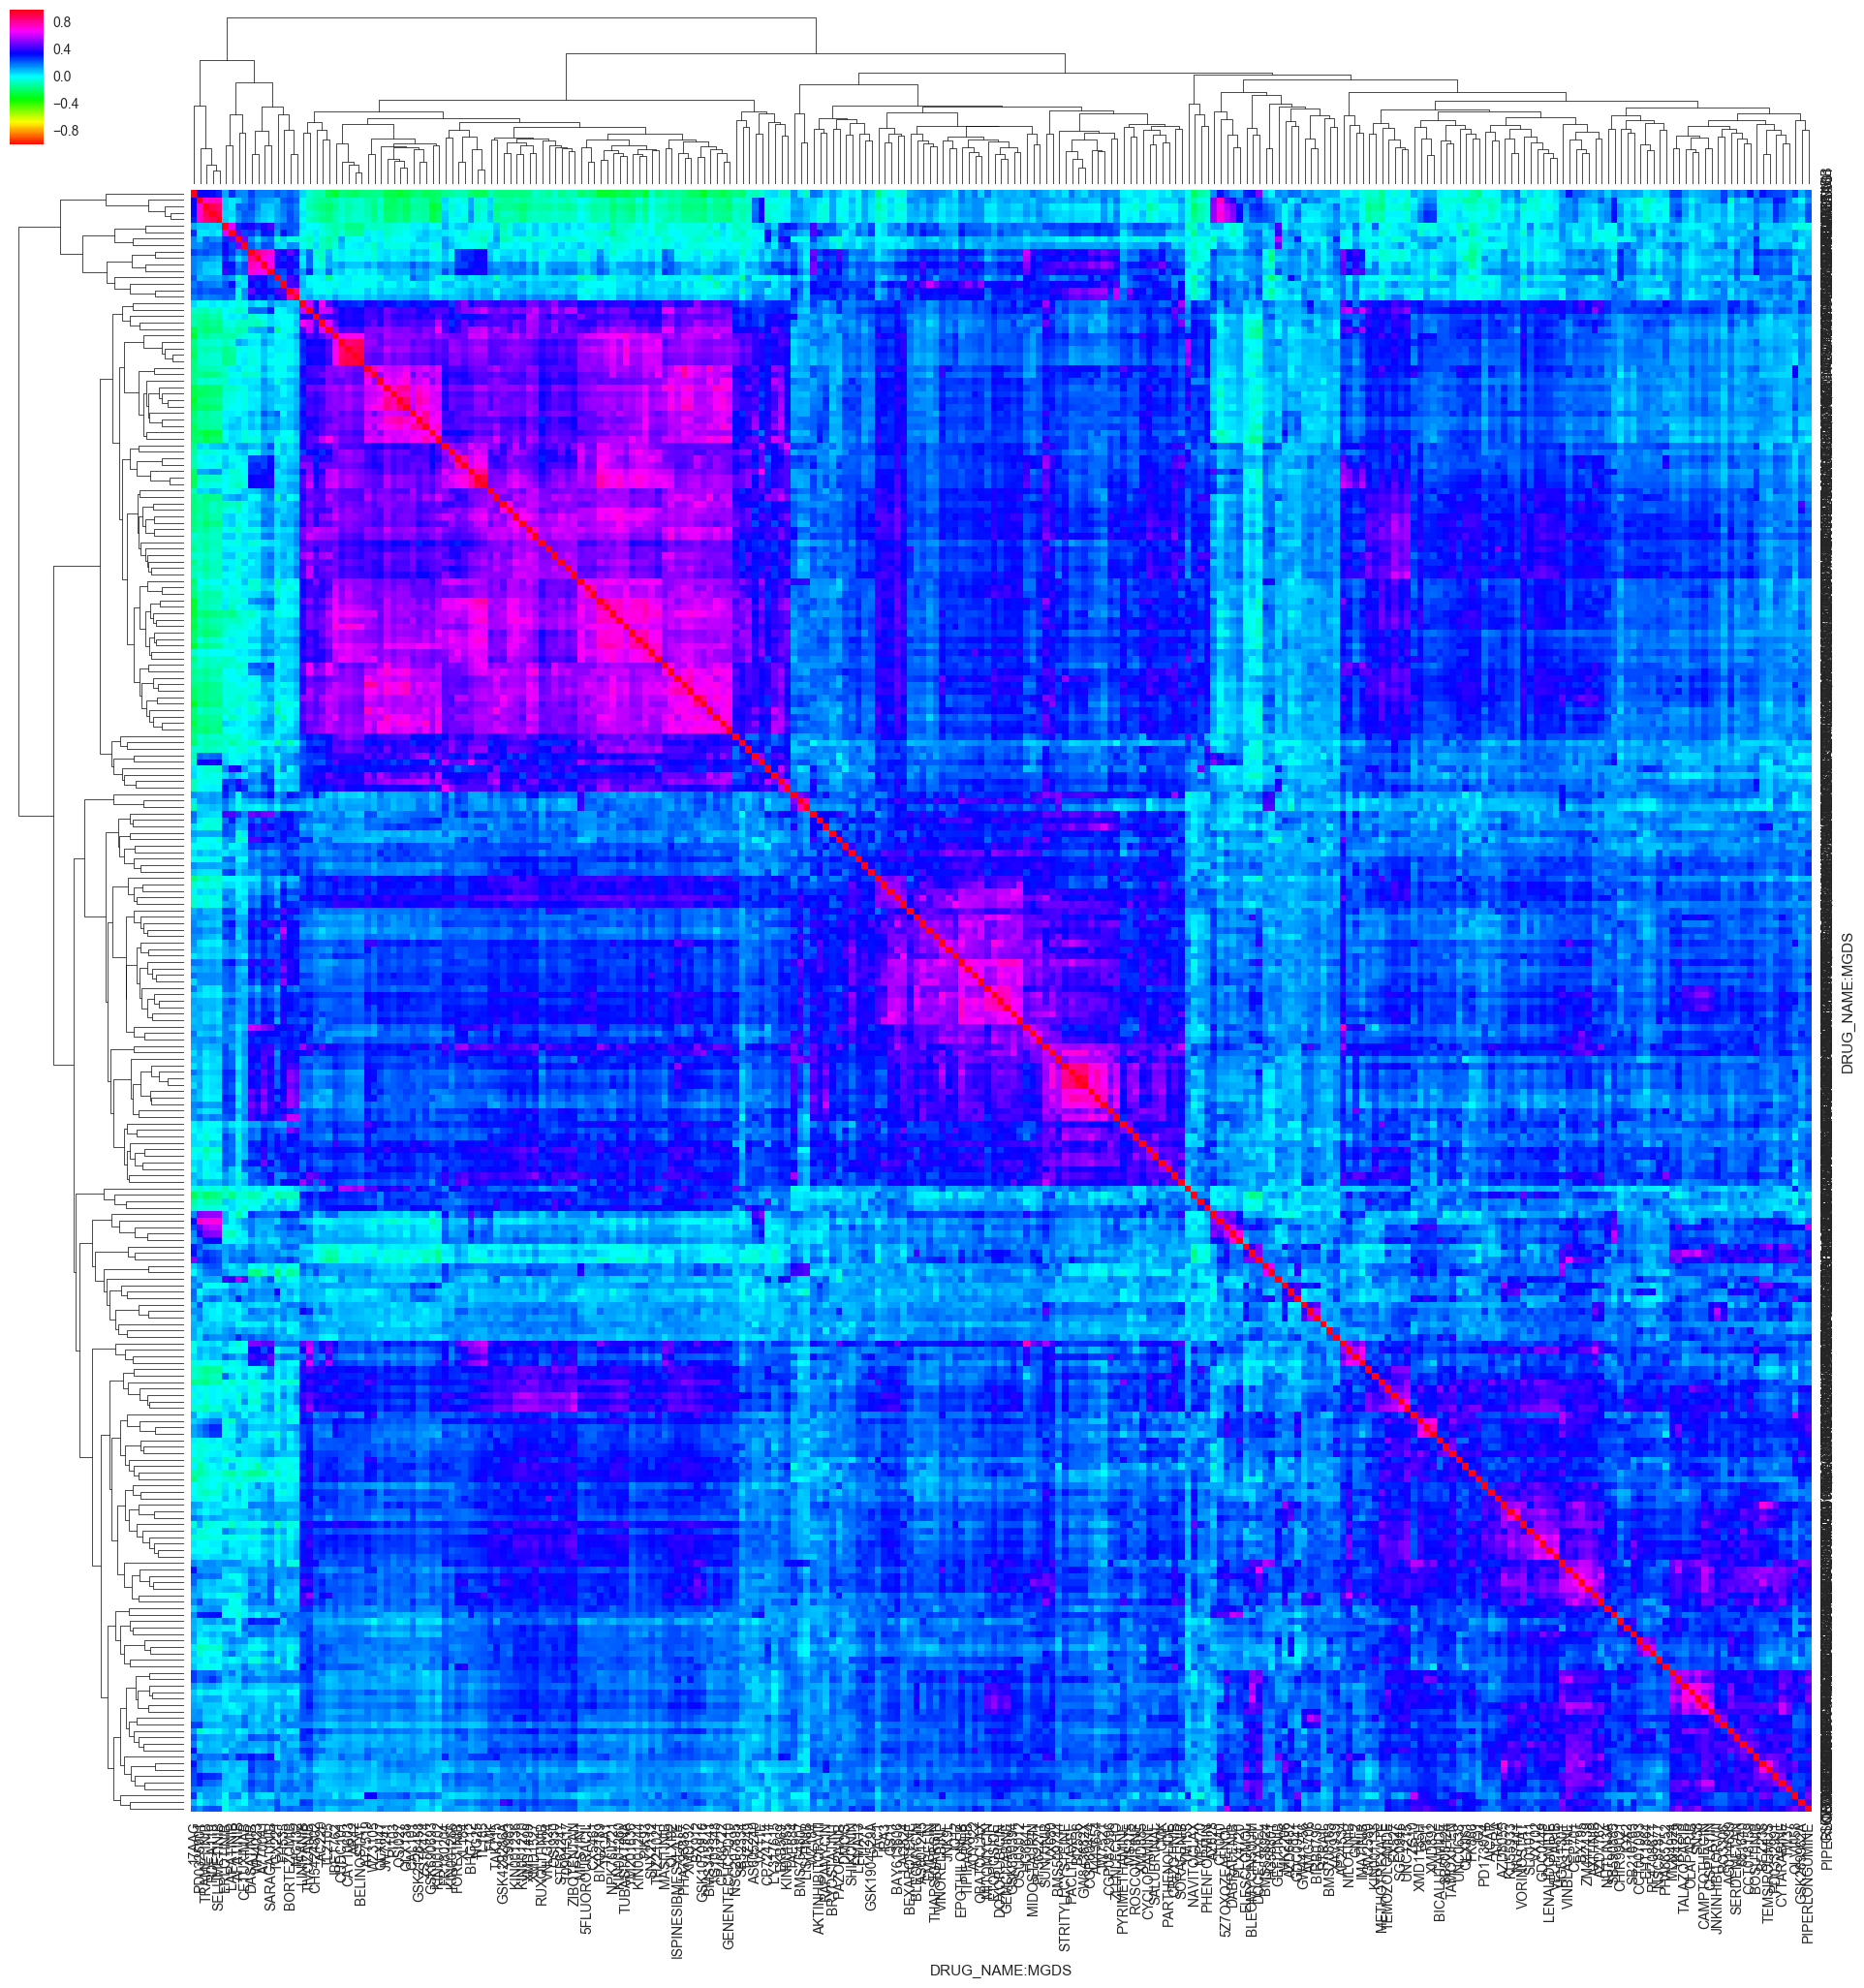

In [21]:
sns.clustermap(dc_pearson, figsize=(24, 24), cmap='hsv')

In [36]:
d_corr = pd.concat([
    dc_spearman.loc['NAVITOCLAX'].rename('spearman'),
    dc_pearson.loc['NAVITOCLAX'].rename('pearson')
], axis=1)
d_corr['rank'] = d_corr.abs().mean(axis=1)
d_corr.sort_values('rank', ascending=False).head(50)

,spearman,pearson,rank
DRUG_NAME:MGDS,,,
NAVITOCLAX,1.000000,1.000000,1.000000
VORINOSTAT,0.492877,0.488601,0.490739
VX702,0.411241,0.419953,0.415597
NILOTINIB,0.403612,0.394342,0.398977
GSK1070916,0.315788,0.447552,0.381670
GDC0449,0.365943,0.372839,0.369391
NPK76II721,0.327282,0.395243,0.361263
BX912,0.315085,0.406762,0.360924
AICAR,0.334404,0.378815,0.356609
